# **Doctor's Consultation Fees Prediction**

**Problem Statement:**

Predict A Doctor's Consultation Fee 

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records

**FEATURES:**

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

**Getting Started**

In [ ]:
#Importing all needed libraries and packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the CSV file of the Dataset
Doctor_train = pd.read_csv('/content/drive/MyDrive/Python_Datasets/Final_Train.csv')
Doctor_test = pd.read_csv('/content/drive/MyDrive/Python_Datasets/Final_Test.csv')

In [ ]:
#Examining the Data
Doctor_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [ ]:
Doctor_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [ ]:
#Shape of the Dataset
Doctor_train.shape , Doctor_test.shape

((5961, 7), (1987, 6))

**Observation :**

1. Training dataset contains 5961 rows and 7 columns 

2. Testing dataset contains 1987 rows and 6 columns

In [ ]:
# Display information about the Dataset

Doctor_train.info()
Doctor_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile    

**Observation :** There are object type variables present in both Datasets except fees of int type present in Training Dataset .

In [ ]:
Doctor_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


**Merging the train and test dataset for data cleaning**

Since we have separate train and test datasets, we will approach it by first merging the two datasets into one for exploring and cleaning the data, after all that process we will separate the datasets back to train and test as they were provided.

In [ ]:
Doctor_train['source']='train'
Doctor_test['source']='test'
Doctor = pd.concat([Doctor_train, Doctor_test],ignore_index=True)
Doctor_train.shape, Doctor_test.shape, Doctor.shape

((5961, 8), (1987, 7), (7948, 8))

In [ ]:
Doctor.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

In [ ]:
Doctor.apply(lambda x: len(x.unique()))

Qualification         1801
Experience              64
Rating                  53
Place                  949
Profile                  6
Miscellaneous_Info    3981
Fees                    41
source                   2
dtype: int64

In [ ]:
#Checking for Missing Values 
Doctor.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

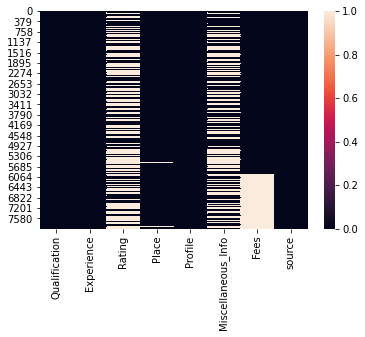

In [ ]:
sns.heatmap(Doctor.isnull())

In [ ]:
#Dropping Miscellaneous_Info column as the information are already presnt .
Doctor.drop(['Miscellaneous_Info'],axis=1,inplace=True)
Doctor

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,NaN,test


In [ ]:
# Filling all Missing Values
Doctor['Place'].fillna('Unknown, Unknown', inplace = True)
Doctor['Rating'].fillna('0%', inplace = True)
Doctor.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place               0
Profile             0
Fees             1987
source              0
dtype: int64

**Feature Enginnering of Data**

In [ ]:
Doctor['Experience'] = Doctor['Experience'].apply(lambda x: x[:-17])
Doctor['Experience'] = Doctor['Experience'].astype(float)
Doctor['Experience']

0       24.0
1       12.0
2        9.0
3       12.0
4       20.0
        ... 
7943    10.0
7944     4.0
7945     9.0
7946    12.0
7947     8.0
Name: Experience, Length: 7948, dtype: float64

In [ ]:
#Splitting Place Column to find the City
for i in range(len(Doctor)):
    Doctor['Place'][i]=Doctor['Place'][i].split(",")[-1]
    
Doctor.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,"BHMS, MD - Homeopathy",24.0,100%,Ernakulam,Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12.0,98%,Bangalore,Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9.0,0%,Bangalore,ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12.0,0%,Bangalore,Ayurveda,250.0,train
4,BAMS,20.0,100%,Chennai,Ayurveda,250.0,train


In [ ]:
Doctor.apply(lambda x: len(x.unique()))

Qualification    1801
Experience         64
Rating             53
Place              10
Profile             6
Fees               41
source              2
dtype: int64

In [ ]:
Doctor['Qualification'].value_counts()[:30]

BDS                                                      632
BHMS                                                     627
BAMS                                                     624
MBBS                                                     441
MBBS, MS - ENT                                           280
MBBS, MD - Dermatology                                   242
MBBS, MD - General Medicine                              227
MBBS, MD - Dermatology , Venereology & Leprosy           193
MBBS, DDVL                                               123
BHMS, MD - Homeopathy                                    120
MBBS, Diploma in Otorhinolaryngology (DLO)               114
BAMS, MD - Ayurveda Medicine                             106
BDS, MDS - Conservative Dentistry & Endodontics           89
MBBS, DDV                                                 81
BDS, MDS                                                  77
BDS, MDS - Oral & Maxillofacial Surgery                   76
MD - Dermatology , Vener

In [ ]:
Doctor["Qualification"] = Doctor["Qualification"].str.split(",")
Qualification ={}
for x in Doctor["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [ ]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])

In [ ]:
for title in final_qua:
    Doctor[title]=0
    
for x,y in zip(Doctor["Qualification"].values,np.array([idx for idx in range(len(Doctor))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            Doctor[q][y] = 1
            
Doctor.drop("Qualification",axis=1,inplace=True)

There was no proper structure in which the values of qualification columns were filled. Most of the values were repeated. The values in the cells were separated by commas, so we split the values based on commas and then made a dictionary from it. Then we selected the top 10 keys from the dictionary and made new columns in the dataset which took in bool values.

In [ ]:
Doctor.head()

,Experience,Rating,Place,Profile,Fees,source,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24.0,100%,Ernakulam,Homeopath,100.0,train,0,0,0,1,0,0,0,0,0,1
1,12.0,98%,Bangalore,Ayurveda,350.0,train,0,0,1,0,0,0,0,0,0,0
2,9.0,0%,Bangalore,ENT Specialist,300.0,train,1,0,0,0,0,0,0,0,0,0
3,12.0,0%,Bangalore,Ayurveda,250.0,train,0,0,1,0,0,0,0,0,0,0
4,20.0,100%,Chennai,Ayurveda,250.0,train,0,0,1,0,0,0,0,0,0,0


In [ ]:
Doctor['Rating'] = Doctor['Rating'].apply(lambda x: x[:-1])
Doctor['Rating'] = Doctor['Rating'].astype(float)
Doctor['Rating']

0       100.0
1        98.0
2         0.0
3         0.0
4       100.0
        ...  
7943      0.0
7944      0.0
7945      0.0
7946     98.0
7947      0.0
Name: Rating, Length: 7948, dtype: float64

In [ ]:
Doctor.dtypes

Experience                              float64
Rating                                  float64
Place                                    object
Profile                                  object
Fees                                    float64
source                                   object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

# **EDA(Exploratory Data Analysis)**

In [ ]:
catergorical_cols = ['Profile', 'Place', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 
                    'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']

continious_cols = ['Rating','Experience','Fees']

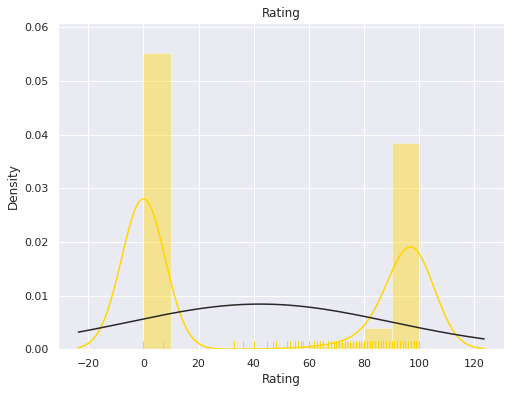

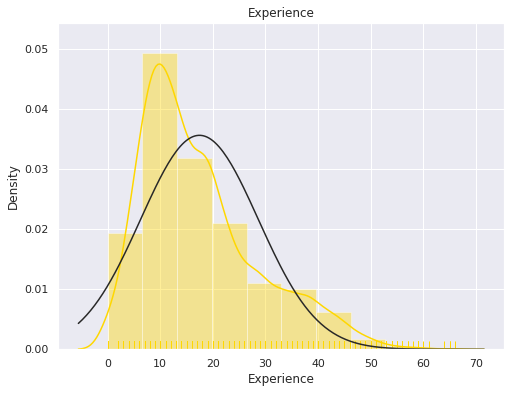

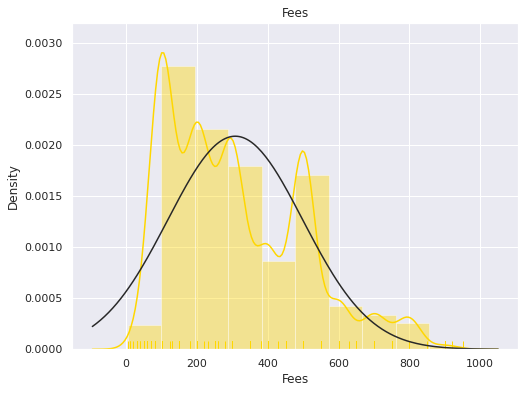

In [ ]:
from scipy.stats import norm
sns.set_theme(style="darkgrid")
for i in Doctor[continious_cols]:                                 #univariate analysis
    plt.figure(figsize = (8,6))
    sns.distplot(Doctor[i], bins = 10, rug=True,color='gold',fit=norm)
    plt.title(i)
    plt.show()

**Observation :**

1. Most of the ratings are 90 and above and are equally skewed.

2. Most of the doctors have experience of around 10 years and is left skewed.

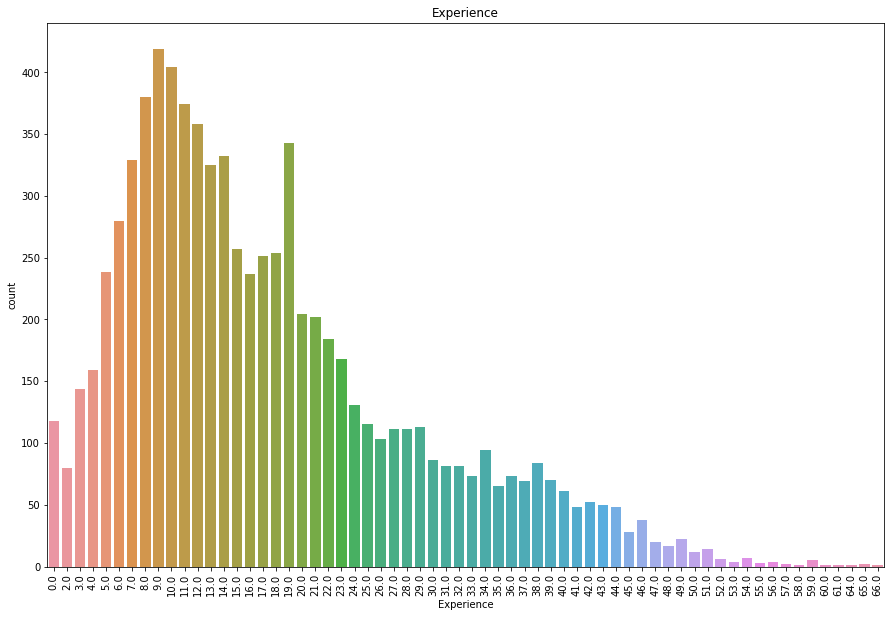

9.0     419
10.0    404
8.0     380
11.0    374
12.0    358
       ... 
60.0      1
64.0      1
61.0      1
58.0      1
66.0      1
Name: Experience, Length: 64, dtype: int64


In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Experience',data=Doctor)
plt.title('Experience')
plt.show()
print(Doctor['Experience'].value_counts())

**Observation:**
Maximum Doctors have experience 5-25 years of experience

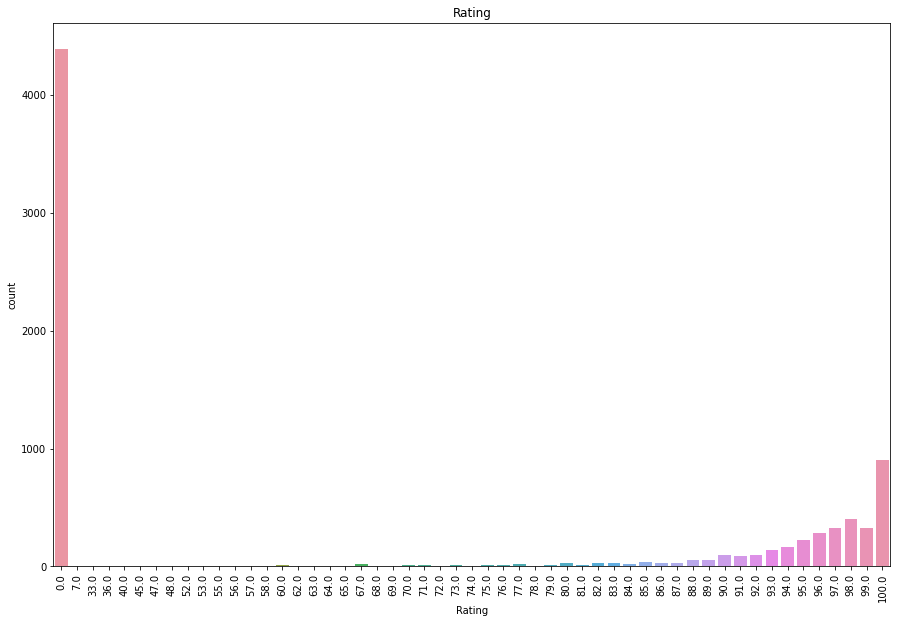

0.0      4392
100.0     907
98.0      402
99.0      327
97.0      325
96.0      285
95.0      225
94.0      166
93.0      143
92.0       95
90.0       95
91.0       86
88.0       54
89.0       53
85.0       35
83.0       32
82.0       32
86.0       27
80.0       26
87.0       25
84.0       20
67.0       17
77.0       17
71.0       16
81.0       15
79.0       15
73.0       13
76.0       13
60.0       11
75.0        8
70.0        8
74.0        7
78.0        7
69.0        6
55.0        5
68.0        5
56.0        5
64.0        4
72.0        3
57.0        3
53.0        2
63.0        2
65.0        2
62.0        2
33.0        2
7.0         1
48.0        1
52.0        1
47.0        1
58.0        1
36.0        1
45.0        1
40.0        1
Name: Rating, dtype: int64


In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Rating',data=Doctor)
plt.title('Rating')
plt.show()
print(Doctor['Rating'].value_counts())

Most of the Ratings given to the doctor is 100%.

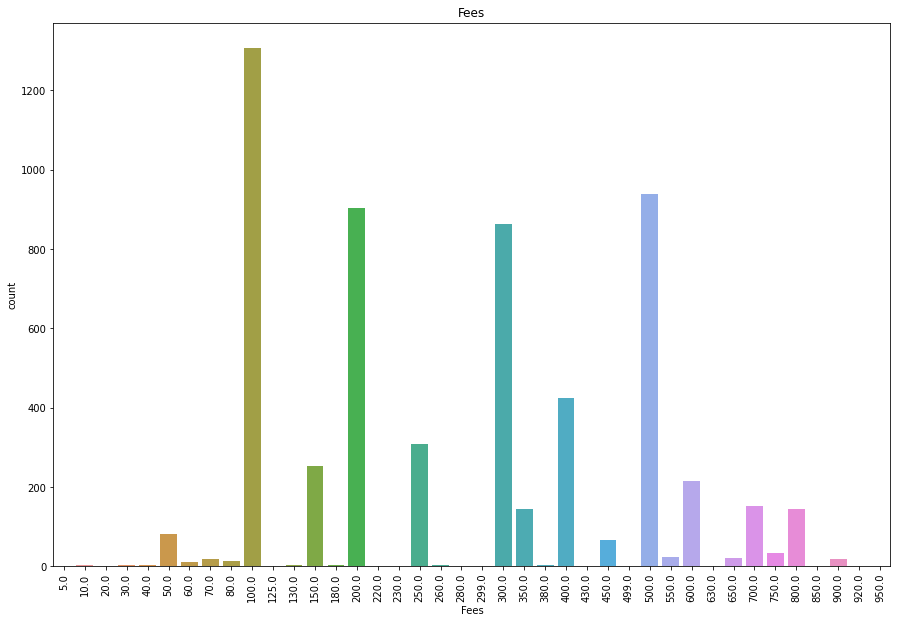

100.0    1306
500.0     938
200.0     904
300.0     864
400.0     424
250.0     307
150.0     253
600.0     215
700.0     153
350.0     143
800.0     143
50.0       81
450.0      65
750.0      34
550.0      22
650.0      21
900.0      18
70.0       18
80.0       12
60.0       11
30.0        4
40.0        2
130.0       2
180.0       2
10.0        2
260.0       2
380.0       2
220.0       1
430.0       1
630.0       1
299.0       1
20.0        1
280.0       1
230.0       1
5.0         1
850.0       1
950.0       1
125.0       1
920.0       1
499.0       1
Name: Fees, dtype: int64


In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Fees',data=Doctor)
plt.title('Fees')
plt.show()
print(Doctor['Fees'].value_counts())

**Observation:**
Most Doctors' Consulation Fees is 100 rupees.

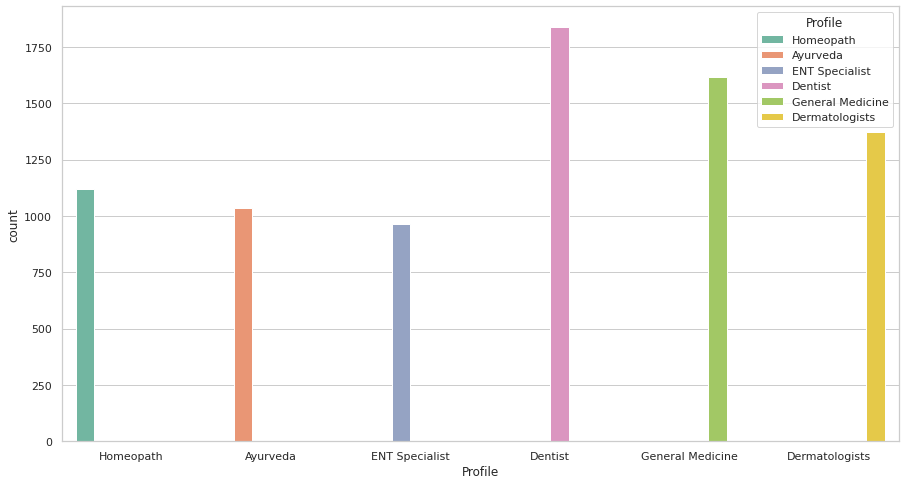

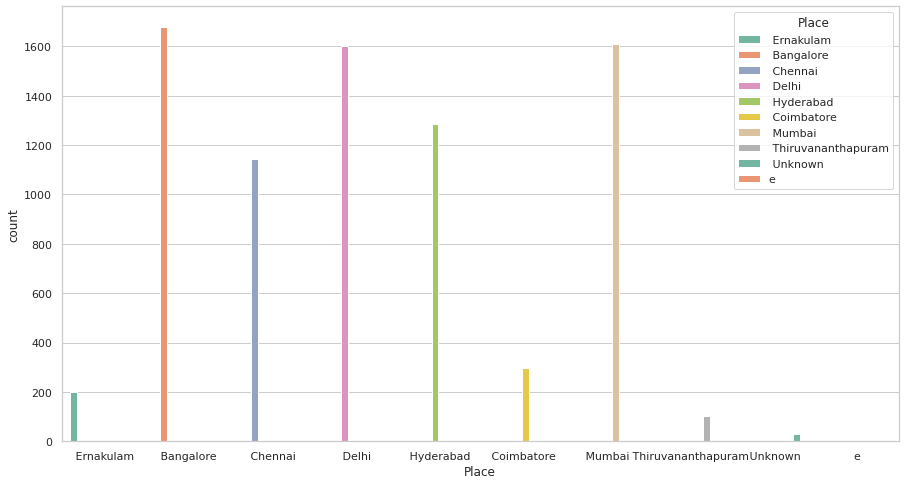

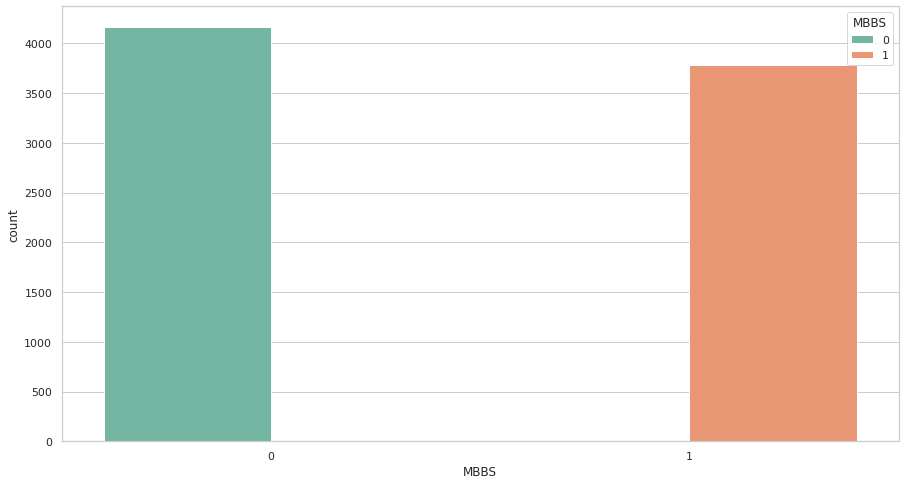

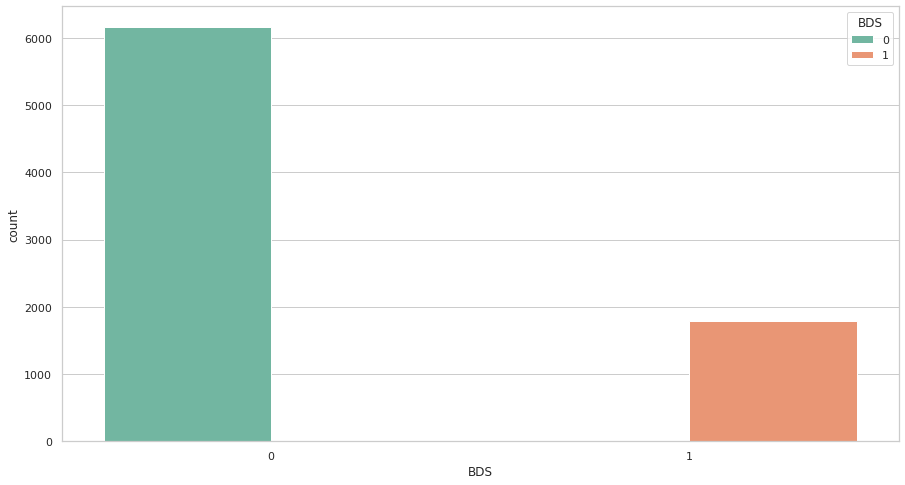

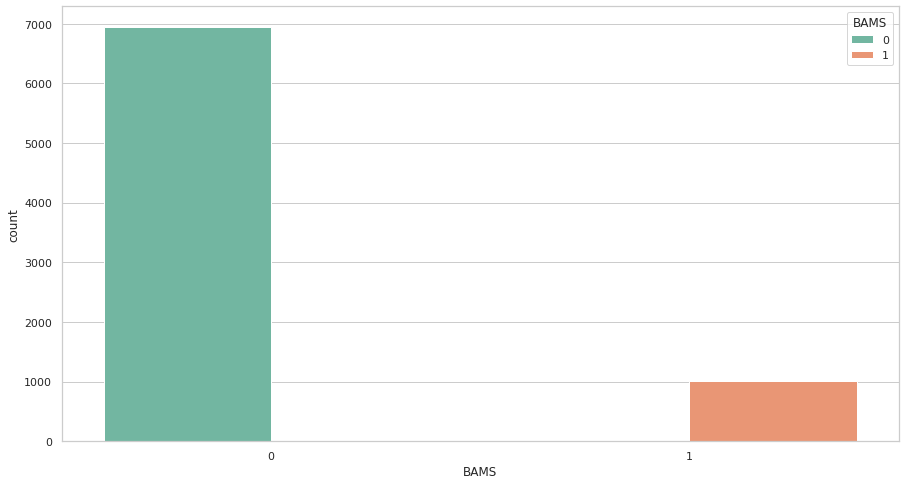

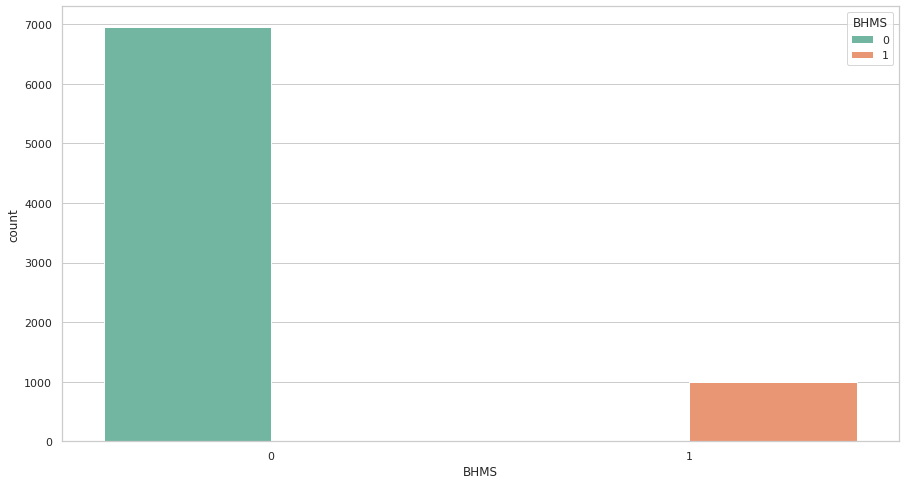

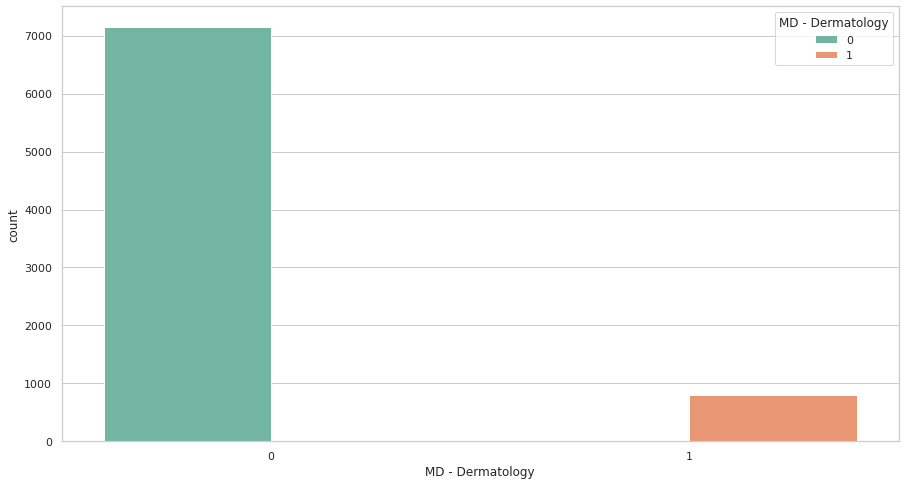

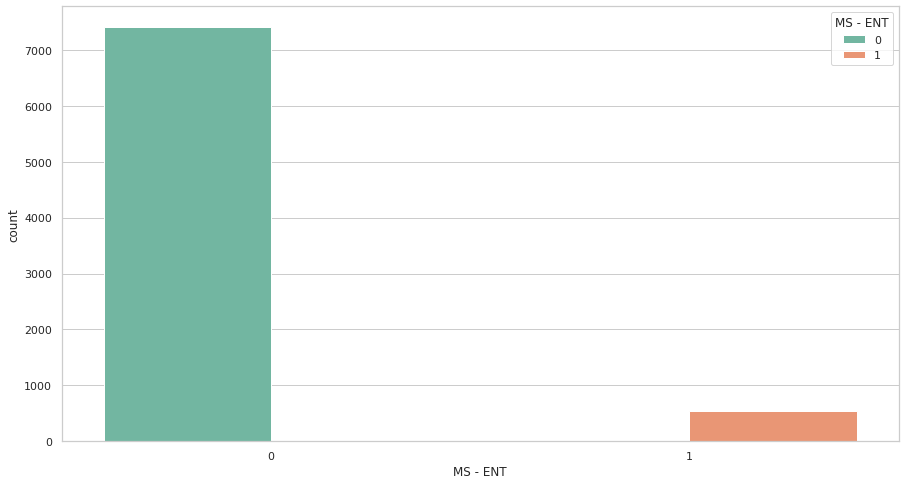

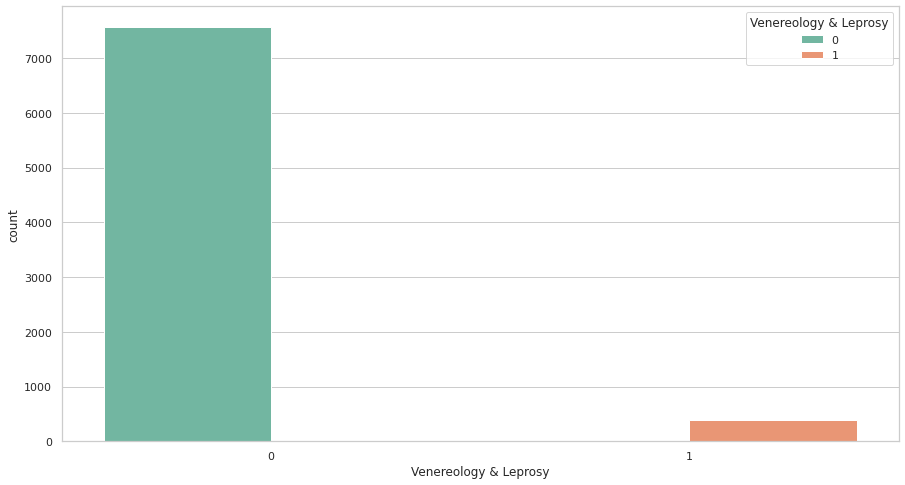

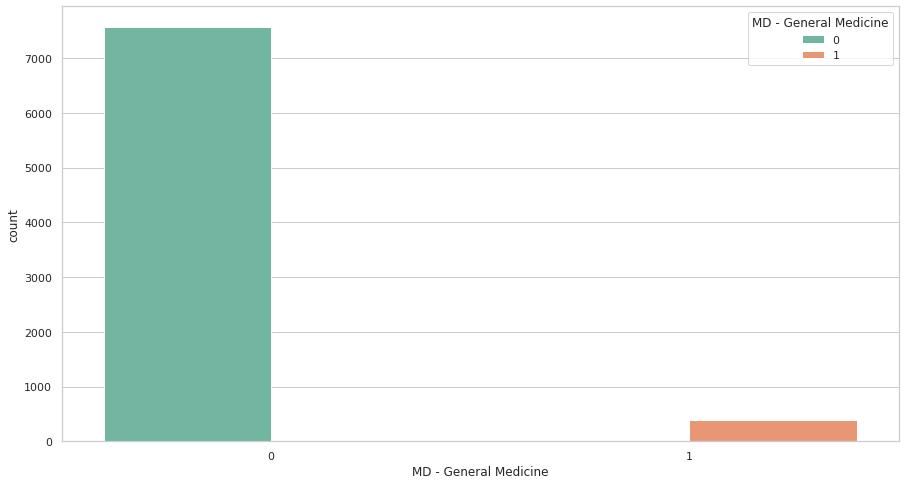

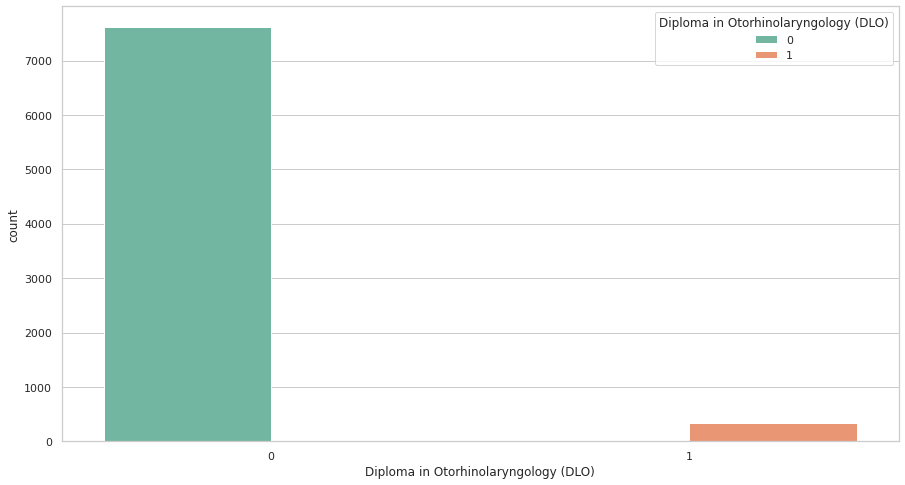

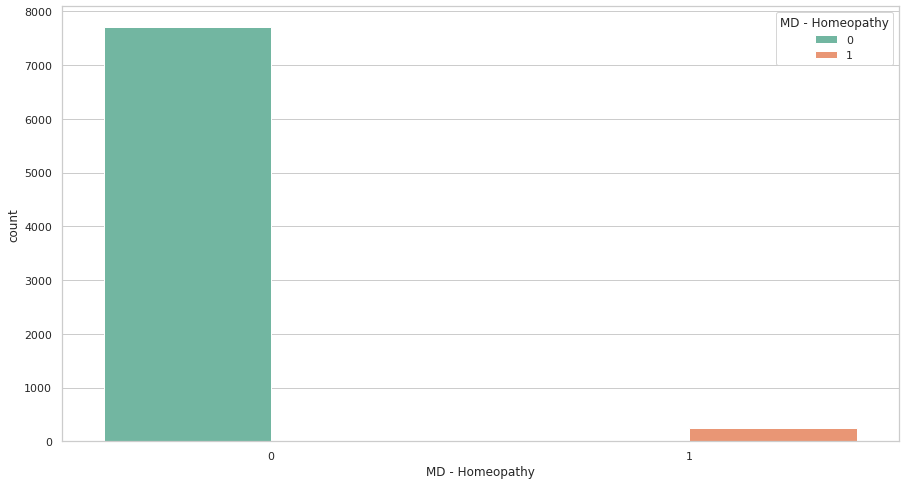

In [ ]:
for i in catergorical_cols:                                 #univariate analysis
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(15,8))
    sns.countplot(x=i,data=Doctor,hue=i,saturation=0.75,palette="Set2")
    plt.show()

**Observation :**

1.In profile graph we can see that Dentist have the highest value count followed by general medicine and dermatologists, and ENT specialist has the lowest count.

2.Most of the doctors are situated in Bangalore, Delhi and Mumbai.

3.Majority of doctors have an MBBS degree compared to other degrees.

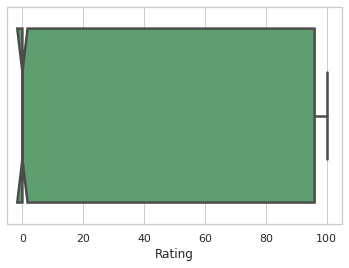

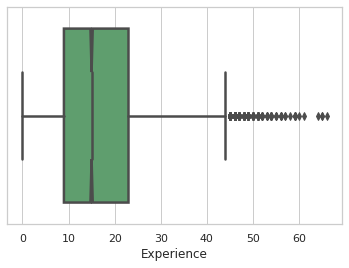

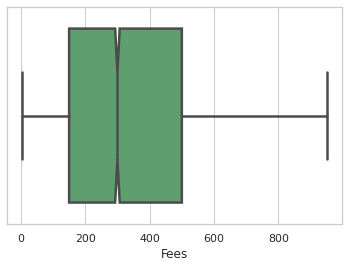

In [ ]:
for i in continious_cols:
  sns.boxplot(Doctor[i], notch=True,color='g',linewidth=2.5)
  plt.show()

**Observation :**
There are some outliers present in Experience column .

**Bivariate Analysis**

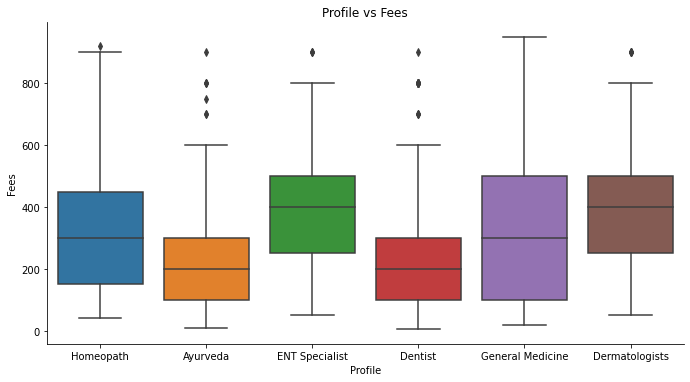

In [ ]:
sns.catplot(x='Profile',y='Fees',data=Doctor,kind='box',height=5,aspect=1.9)
plt.title('Profile vs Fees')
plt.show()

**Observation:**

1.ENT Specialists and Dermatologists Consulation Fees are higher.

2.Ayurveda and Dentists Consultation Fees are lower.

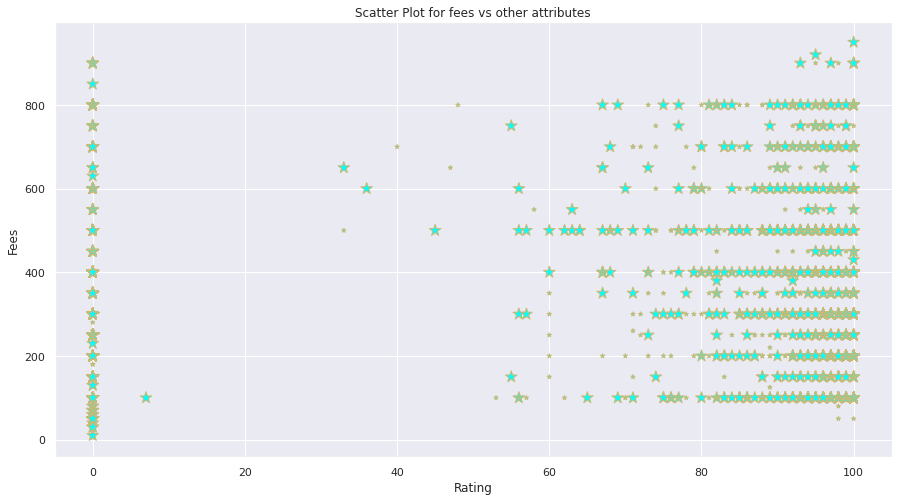

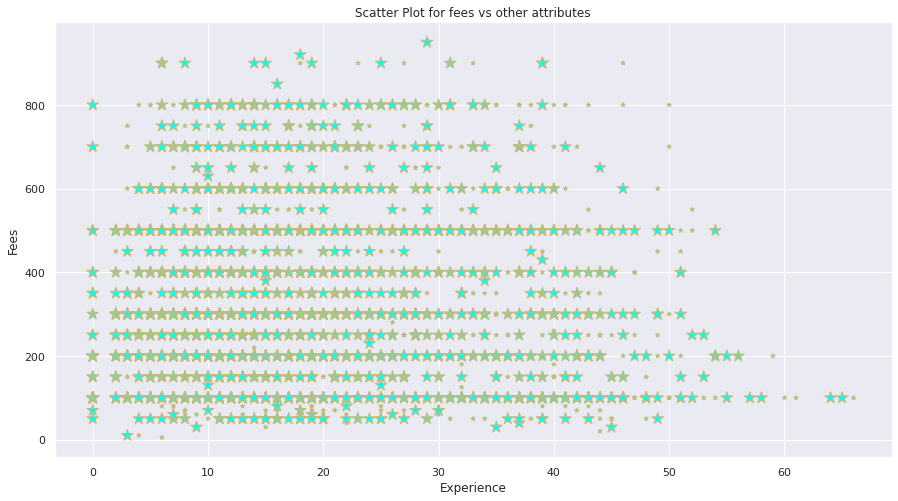

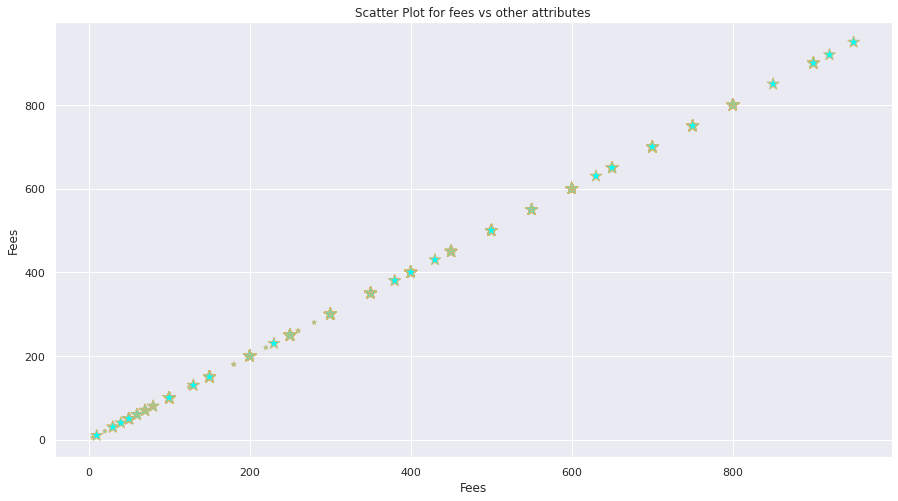

In [ ]:
for i in continious_cols:    
    sns.set_theme(style="darkgrid")                                  #bivariate analysis
    plt.figure(figsize = (15, 8))
    plt.scatter(x=i,y='Fees',data=Doctor,sizes=(20, 150),edgecolors='y',c='red',marker ="*")
    plt.title('Scatter Plot for fees vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Fees')  
    plt.show()

**Observation:**

1.It seems Experience is not much related to Fees.

2.As most of the Ratings lies between 90-100. So Most of the Fees are distributed in that region.

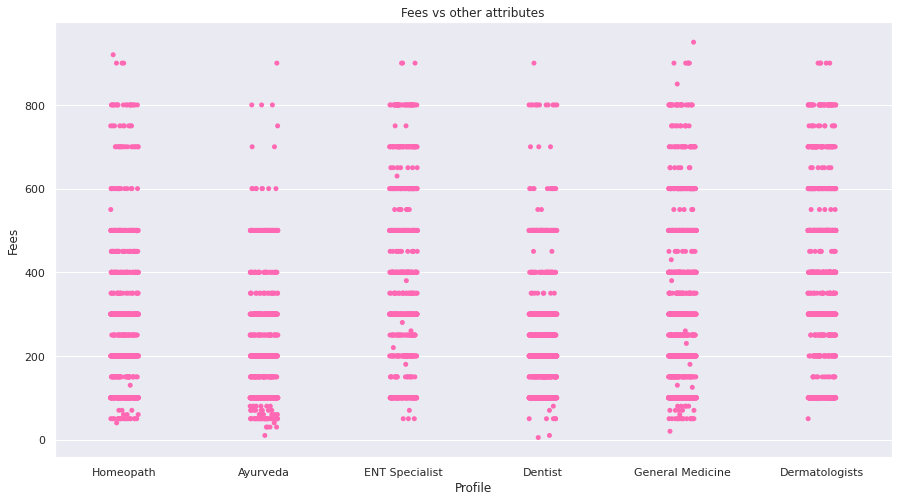

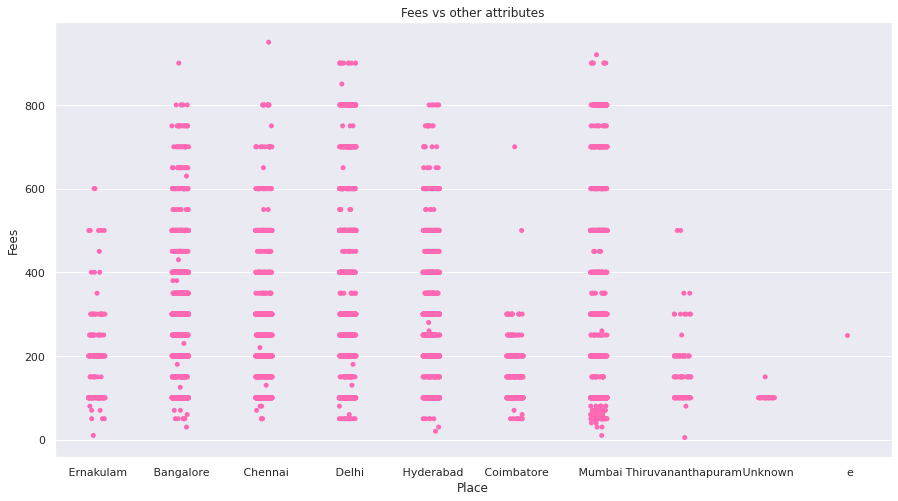

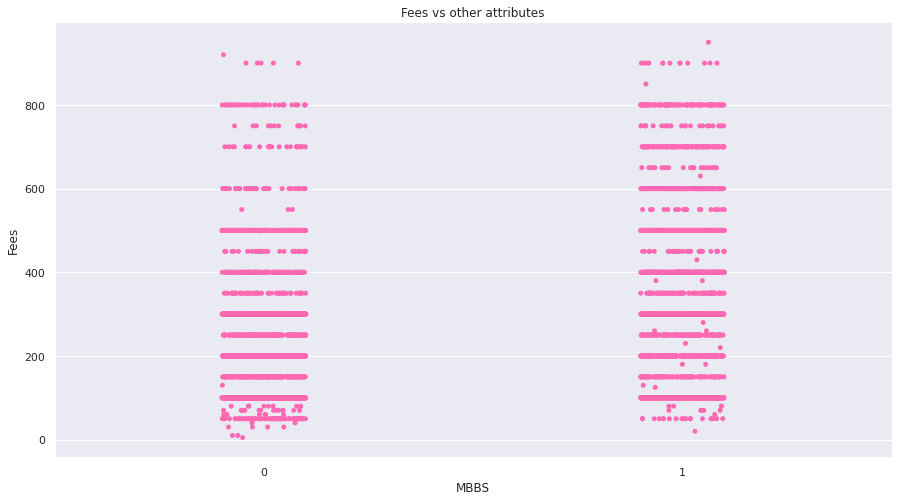

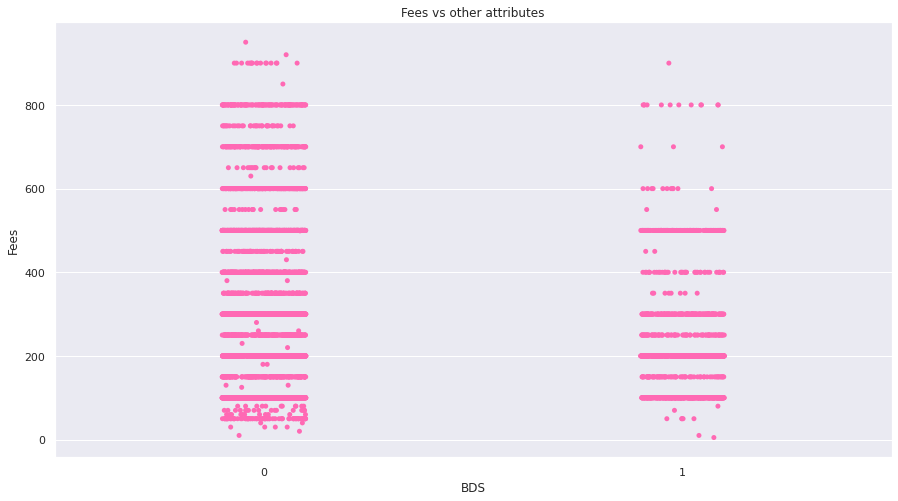

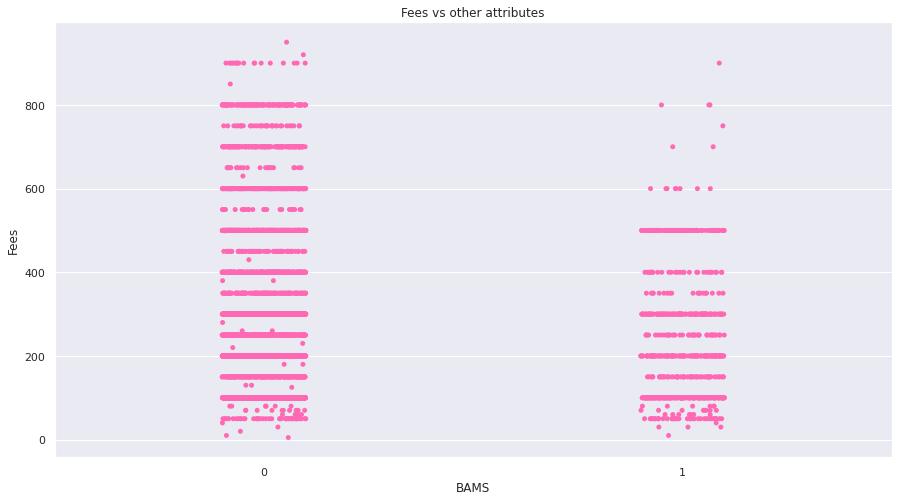

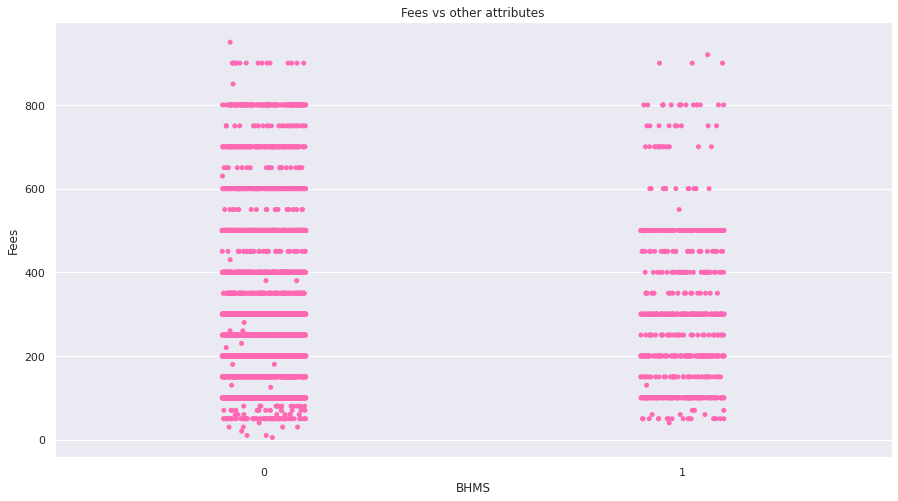

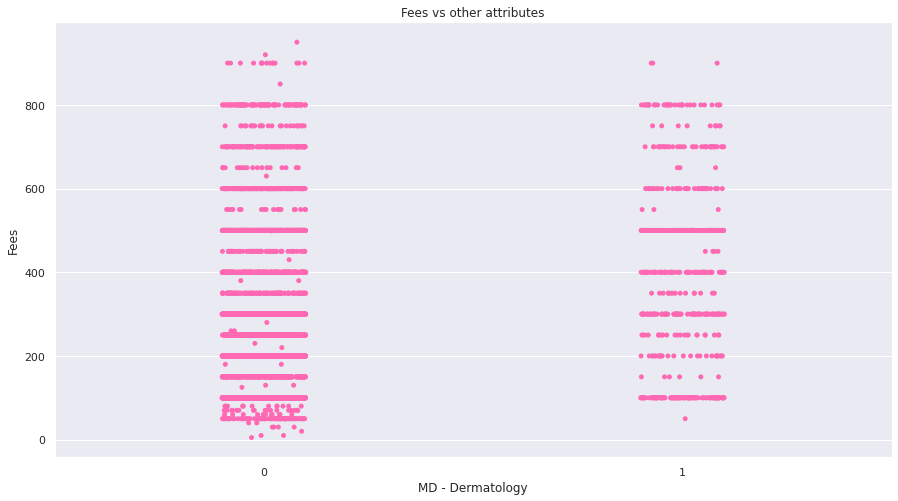

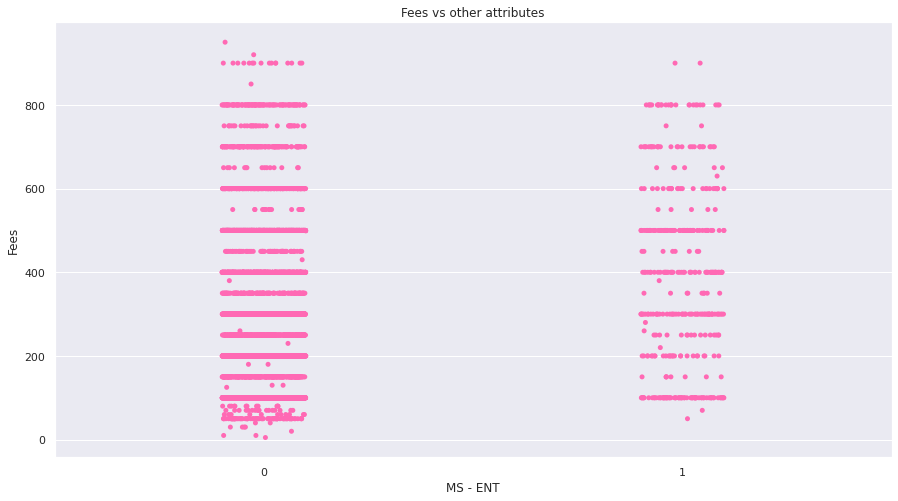

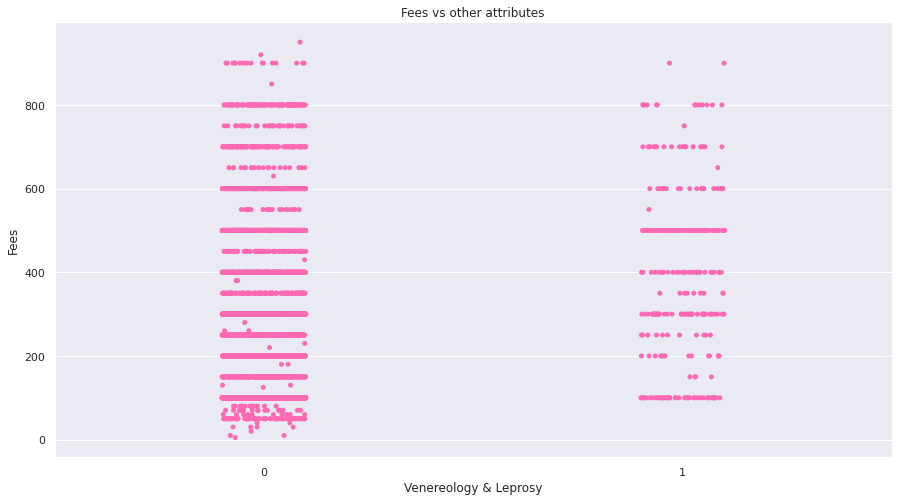

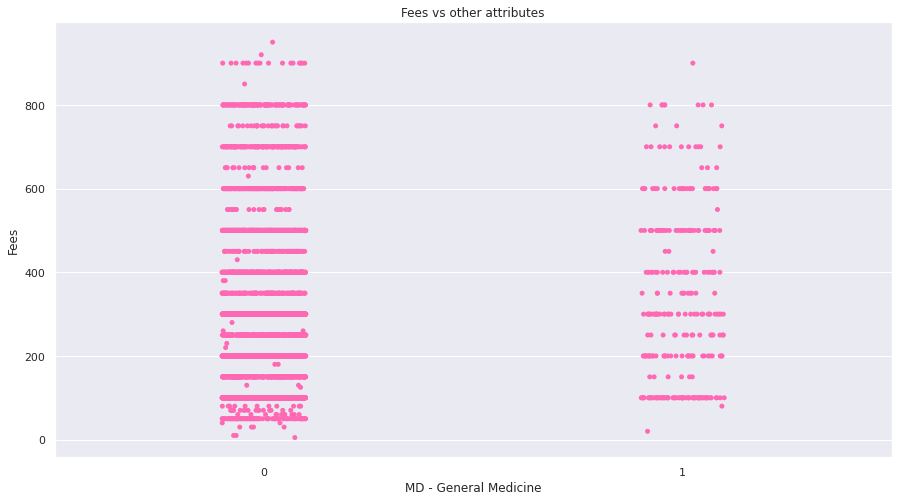

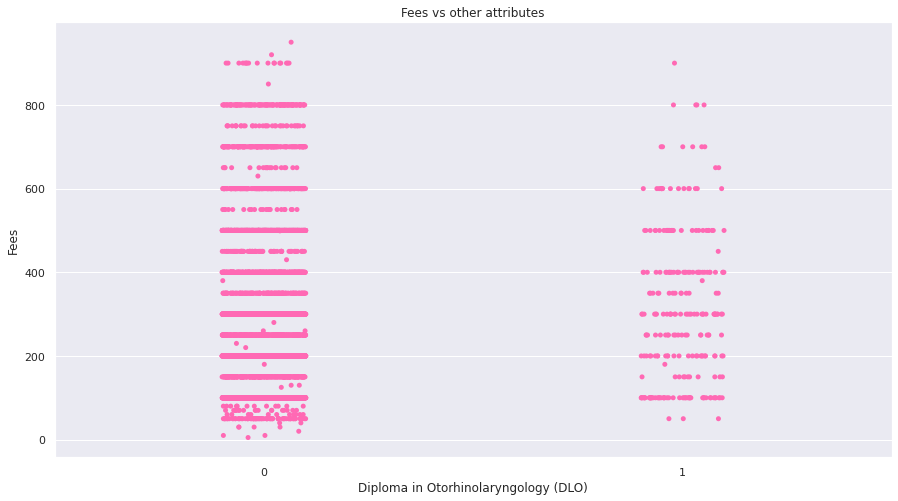

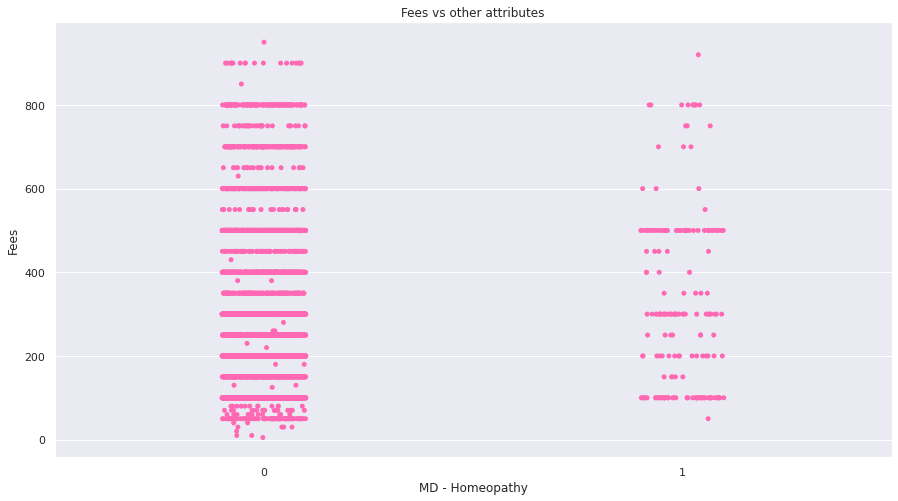

In [ ]:
for i in catergorical_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(Doctor[i], Doctor['Fees'],color ='hotpink',edgecolor='gray')
    ax.set(xlabel = i, ylabel = 'Fees')
    plt.title('Fees vs other attributes')
    plt.show()

Ayurveda doctors seems to have lower fees than other profiles.

In the city graph, there is a bin with 'e', after checking the original data we found out that it was a typo, so we replaced that e with unknown.

In [ ]:
Doctor['Place'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Unknown', 'e'],
      dtype=object)

In [ ]:
Doctor.loc[Doctor['Place'] == 'e']

,Experience,Rating,Place,Profile,Fees,source,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
3980,23.0,0.0,e,Dentist,250.0,train,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Replace e with unknown 
Doctor.iloc[3980, Doctor.columns.get_loc('Place')] = ' Unknown'

In [ ]:
Doctor.head()

,Experience,Rating,Place,Profile,Fees,source,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24.0,100.0,Ernakulam,Homeopath,100.0,train,0,0,0,1,0,0,0,0,0,1
1,12.0,98.0,Bangalore,Ayurveda,350.0,train,0,0,1,0,0,0,0,0,0,0
2,9.0,0.0,Bangalore,ENT Specialist,300.0,train,1,0,0,0,0,0,0,0,0,0
3,12.0,0.0,Bangalore,Ayurveda,250.0,train,0,0,1,0,0,0,0,0,0,0
4,20.0,100.0,Chennai,Ayurveda,250.0,train,0,0,1,0,0,0,0,0,0,0


**Performing Label Encoder**

In [ ]:
Doctor.dtypes

Experience                              float64
Rating                                  float64
Place                                    object
Profile                                  object
Fees                                    float64
source                                   object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [ ]:
A = ['Profile', 'Place']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in A:
    Doctor[i] = label_encoder.fit_transform(Doctor[i])

**Checking Correlation between Attributes and Target Variable**

In [ ]:
cor = Doctor.corr()
cor

,Experience,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
Experience,1.000000,-0.033530,0.010984,0.190219,0.002117,0.273434,-0.199226,-0.035147,-0.124652,-0.060757,0.089545,-0.122006,0.086044,0.118065,0.012232
Rating,-0.033530,1.000000,-0.088571,-0.128273,0.153273,0.002516,0.227425,-0.152976,-0.097287,0.114147,-0.008410,0.062470,-0.032839,-0.013733,-0.000249
Place,0.010984,-0.088571,1.000000,-0.004244,-0.035898,-0.064556,-0.001522,0.024579,0.026426,-0.019650,-0.036757,-0.006491,0.001904,-0.089295,0.040671
Profile,0.190219,-0.128273,-0.004244,1.000000,0.145226,0.358269,-0.474562,-0.561507,0.577050,-0.090818,0.090536,-0.060498,0.204978,0.073725,0.271915
Fees,0.002117,0.153273,-0.035898,0.145226,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601
MBBS,0.273434,0.002516,-0.064556,0.358269,0.271038,1.000000,-0.512751,-0.361169,-0.358541,0.312423,0.256889,0.210155,0.215210,0.205897,-0.164902
BDS,-0.199226,0.227425,-0.001522,-0.474562,-0.198635,-0.512751,1.000000,-0.205124,-0.204071,-0.180368,-0.145419,-0.121311,-0.121478,-0.112921,-0.095747
BAMS,-0.035147,-0.152976,0.024579,-0.561507,-0.139891,-0.361169,-0.205124,1.000000,-0.144007,-0.127281,-0.102618,-0.085606,-0.080427,-0.079685,-0.067566
BHMS,-0.124652,-0.097287,0.026426,0.577050,-0.002423,-0.358541,-0.204071,-0.144007,1.000000,-0.125364,-0.102091,-0.085167,-0.076422,-0.079276,0.341153
MD - Dermatology,-0.060757,0.114147,-0.019650,-0.090818,0.163811,0.312423,-0.180368,-0.127281,-0.125364,1.000000,-0.090233,0.631572,-0.075378,-0.065900,-0.059411


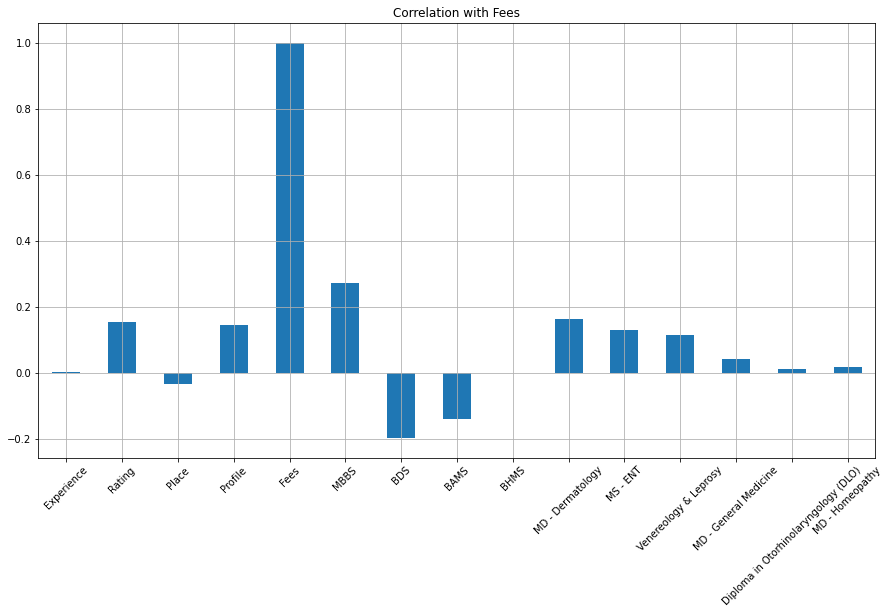

In [ ]:
#Correlation of Average Price with other attributes

Doctor.corrwith(Doctor.Fees).plot.bar(figsize=(15,8),title = 'Correlation with Fees',rot=45,grid=True)

**Observation :**

1.Attributes namely Experience,Rating,Profile,MBBS have +ve correlation with Target Variable.

2. Attribute namely Place,BDS,BAMS have -ve correlation with Target Variable .

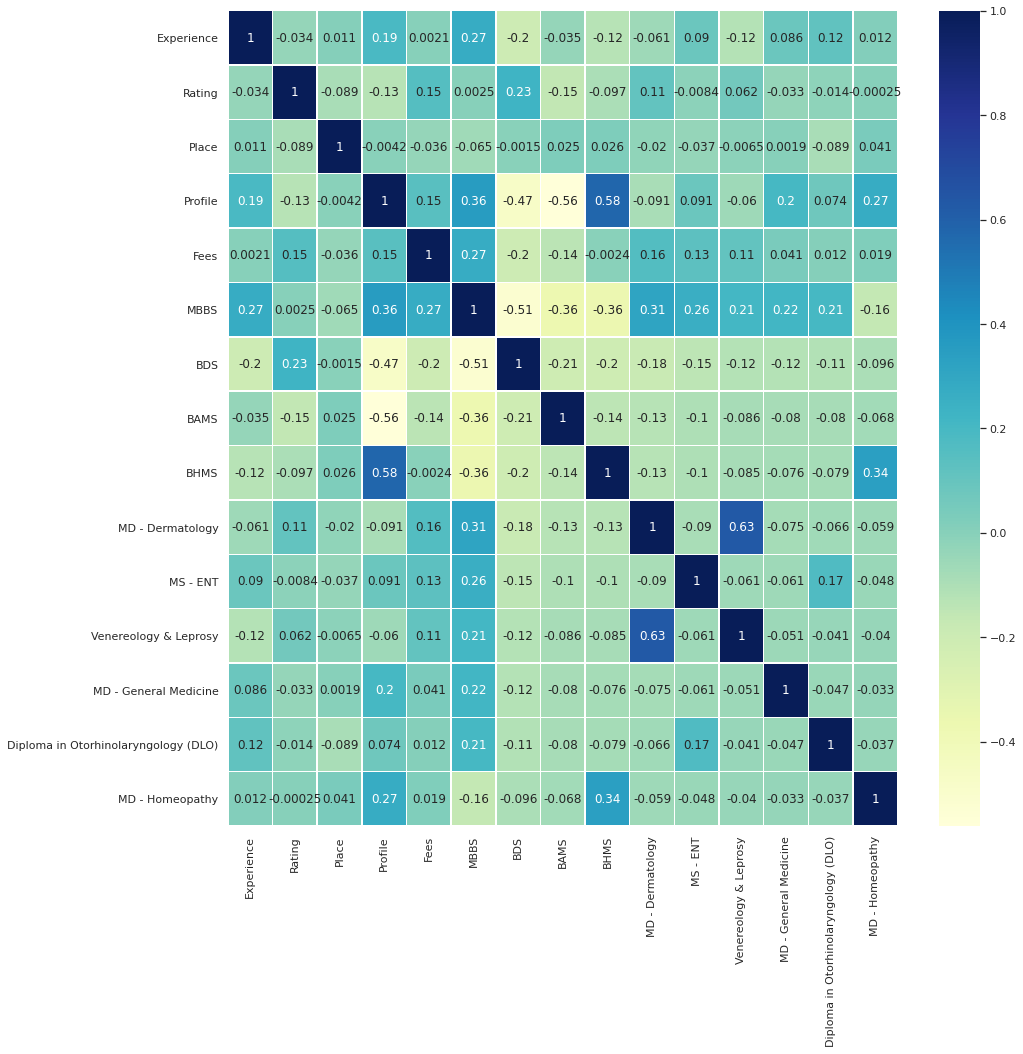

In [ ]:
# Plotting Heatmap to show Correlation between Variables

plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

**Observation :**

1.MBBS and Rating column seems to have the highest correlation with Fees.

2.Profile is positively correlated with Fees whereas Rating is negatively correlated.

In [ ]:
cor['Fees'].sort_values(ascending=False)  #Display Coorelation values of all attributes

Fees                                    1.000000
MBBS                                    0.271038
MD - Dermatology                        0.163811
Rating                                  0.153273
Profile                                 0.145226
MS - ENT                                0.128413
Venereology & Leprosy                   0.113091
MD - General Medicine                   0.040921
MD - Homeopathy                         0.018601
Diploma in Otorhinolaryngology (DLO)    0.011560
Experience                              0.002117
BHMS                                   -0.002423
Place                                  -0.035898
BAMS                                   -0.139891
BDS                                    -0.198635
Name: Fees, dtype: float64

# **Data Cleaning**

**Checking for Null Values**

In [ ]:
Doctor.isnull().sum()

Experience                                 0
Rating                                     0
Place                                      0
Profile                                    0
Fees                                    1987
source                                     0
MBBS                                       0
BDS                                        0
BAMS                                       0
BHMS                                       0
MD - Dermatology                           0
MS - ENT                                   0
Venereology & Leprosy                      0
MD - General Medicine                      0
Diploma in Otorhinolaryngology (DLO)       0
MD - Homeopathy                            0
dtype: int64

**Observation :**
There are null values present in Fees attribute .

In [ ]:
Doctor['Fees'].fillna(value=Doctor['Fees'].mean(),inplace=True)

In [ ]:
Doctor.isnull().sum()

Experience                              0
Rating                                  0
Place                                   0
Profile                                 0
Fees                                    0
source                                  0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

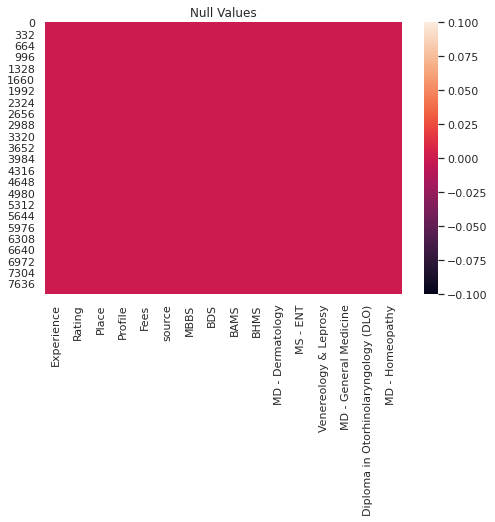

In [ ]:
#Plotting Null Values

plt.figure(figsize=[8,5])
sns.heatmap(Doctor.isnull())
plt.title("Null Values")
plt.show()

**NO null values are present in the Dataset .**

**2.Checking for Outliers**

Experience                                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Rating                                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Place                                    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Profile                                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Fees                                       AxesSubplot(0.125,0.518913;0.168478x0.16413)
MBBS                                    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
BDS                                     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
BAMS                                    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
BHMS                                       AxesSubplot(0.125,0.321957;0.168478x0.16413)
MD - Dermatology                        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MS - ENT                                AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Venereology & Leprosy           

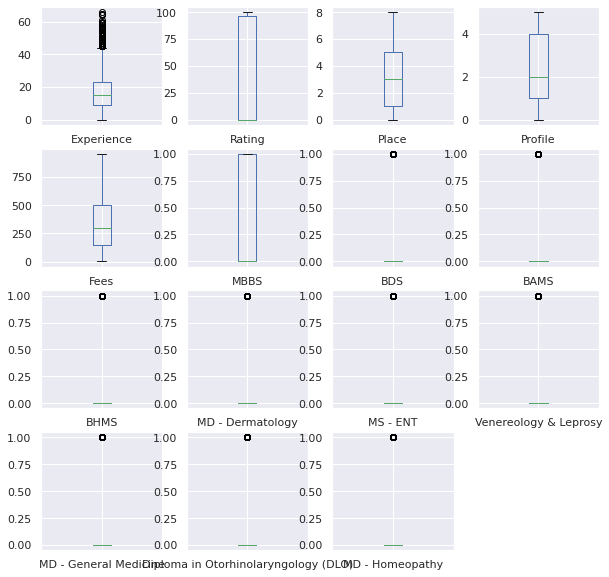

In [ ]:
#Plotting Outliers
Doctor.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

**3.Checking for skewness**

In [ ]:
Doctor[continious_cols].skew()

Rating        0.241674
Experience    0.984224
Fees          0.751870
dtype: float64

There are skewness present in some columns . Lets remove it .

In [ ]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
if Doctor.skew().loc['Experience']>0.55:
   Doctor['Experience']=pt.fit_transform(Doctor['Experience'].values.reshape(-1,1))

In [ ]:
pt=PowerTransformer(method='yeo-johnson')
if Doctor.skew().loc['Fees']>0.55:
   Doctor['Fees']=pt.fit_transform(Doctor['Fees'].values.reshape(-1,1))

In [ ]:
Doctor[continious_cols].skew()

Rating        0.241674
Experience    0.000741
Fees         -0.046217
dtype: float64

All variables are skewed properly .

**Split Data and Target**

In [ ]:
Doctor_train = Doctor.loc[Doctor['source'] == 'train']
Doctor_test = Doctor.loc[Doctor['source'] == 'test']

In [ ]:
Doctor_train.shape, Doctor_test.shape

((5961, 16), (1987, 16))

In [ ]:
Doctor_train.drop('source', axis = 1, inplace = True)

In [ ]:
Doctor_test.drop(['source', 'Fees'], axis = 1, inplace = True)

In [ ]:
X = Doctor_train.drop('Fees', axis = 1)
y = Doctor_train['Fees']

In [ ]:
X.head()

,Experience,Rating,Place,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24.0,100.0,4,5,0,0,0,1,0,0,0,0,0,1
1,12.0,98.0,0,0,0,0,1,0,0,0,0,0,0,0
2,9.0,0.0,0,3,1,0,0,0,0,0,0,0,0,0
3,12.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0
4,20.0,100.0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
y.head()

0    100.0
1    350.0
2    300.0
3    250.0
4    250.0
Name: Fees, dtype: float64

**Scalling**

In [ ]:
#Scale the Data using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [ ]:
X.head()

,Experience,Rating,Place,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.600979,1.220669,0.397991,1.543016,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,5.650991
1,-0.476040,1.178419,-1.331496,-1.472893,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960
2,-0.745295,-0.891845,-1.331496,0.336652,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960
3,-0.476040,-0.891845,-1.331496,-1.472893,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960
4,0.241972,1.220669,-0.899125,-1.472893,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,-0.224079,-0.208788,-0.176960


In [ ]:
#Function to calculate Root Mean Squared Log Error (RMSLE)
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

**Finding Best Random State**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Best Random State is ', maxRS)

Best Random State is  44


**Creating train test split**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = maxRS)

# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# **Modeling**

In [ ]:
#Importing all libraries and packages
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.svm import SVR          
from sklearn.model_selection import cross_val_score          #for cross validating model

In [ ]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
GBR =  GradientBoostingRegressor()
KNN = KNeighborsRegressor()
AD = AdaBoostRegressor()
RD = Ridge()
SV = SVR()
LA = Lasso()
EL = ElasticNet()

models = [LR, DT, RF, GBR, KNN, RD, SV, AD, LA, EL]

for m in models:
  print(m)
  print("\n")
  m.fit(x_train,y_train)
  pred = m.predict(x_test)
  print("Model_Score is :",score(y_test,pred))
  print("r2_Score is :",r2_score(y_test,pred))
  print("Mean_Squared_Error is :",mean_squared_error(y_test,pred))
  print("Mean_Absolute_Error is :",mean_absolute_error(y_test,pred))
  print("Root_Mean_Squared_Error is:",np.sqrt(mean_squared_error(y_test,pred)))
  print("-----------------------------X----------------------------")
  print("\n\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Model_Score is : 0.7933636919066265
r2_Score is : 0.14478661455982011
Mean_Squared_Error is : 31875.760121422856
Mean_Absolute_Error is : 141.61963691039057
Root_Mean_Squared_Error is: 178.53783946666
-----------------------------X----------------------------



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


Model_Score is : 0.6763262289671413
r2_Score is : -0.42472147249916525
Mean_Squared_Error is : 53102.62990545808
Mean_Absolute_Error is : 169.33900955575075
Root_Mean_Squared_Error is: 230.4400787741969
-----------------------------X-------------------

**Computing Cross Validation Score**

In [ ]:
for c in models:
  cvs = cross_val_score(c,X,y,cv=5)
  print('Cross Validation SCore for',c,'model is :',cvs.mean())
  print('Difference between r2_score and cross validation score is :',r2_score(y_test,pred)-cvs.mean())
  print('\n')

Cross Validation SCore for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model is : 0.12707304143829196
Difference between r2_score and cross validation score is : -0.024891723222550344


Cross Validation SCore for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') model is : -0.4885984069163335
Difference between r2_score and cross validation score is : 0.5907797251320751


Cross Validation SCore for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease

# **Hyper_Parameter_Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
RF.get_params   #Checking Parameters list

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [ ]:
parameter = {
    'n_estimators': [200, 500],
    'max_depth' : [4,8],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['mse', 'mae']
    }

In [ ]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

**Building_Final_Model**

In [ ]:
Final_Model = RandomForestRegressor(max_features='sqrt', n_estimators= 500, max_depth=8,criterion='mse')
Final_Model.fit(x_train, y_train)
pred_model = Final_Model.predict(x_test)
r2score=r2_score(y_test,pred_model)
print("Score of Model of ",Final_Model,"is :",score(y_test, pred_model)*100)
print('\nR2_score of best fitted model is :',r2score*100)
print ('Mean_Squared_error is:',mean_squared_error(y_test, pred_model))
print ('Mean_Absolute_error is :',mean_absolute_error(y_test, pred_model))
print('Root_Mean_squared_Error is :',np.sqrt(mean_squared_error(y_test,pred)))

Score of Model of  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is : 80.60032268997685

R2_score of best fitted model is : 18.844973179423587
Mean_Squared_error is: 30248.335814445436
Mean_Absolute_error is : 136.12925994774454
Root_Mean_squared_Error is : 182.93101711542164


**Our model learnt almost 81%**

Checking Cross Validation

In [ ]:
cvs = cross_val_score(Final_Model,X,y,cv=5)
print('Cross validation score of ',Final_Model,'is :',cvs.mean())

Cross validation score of  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) is : 0.17505698103398912


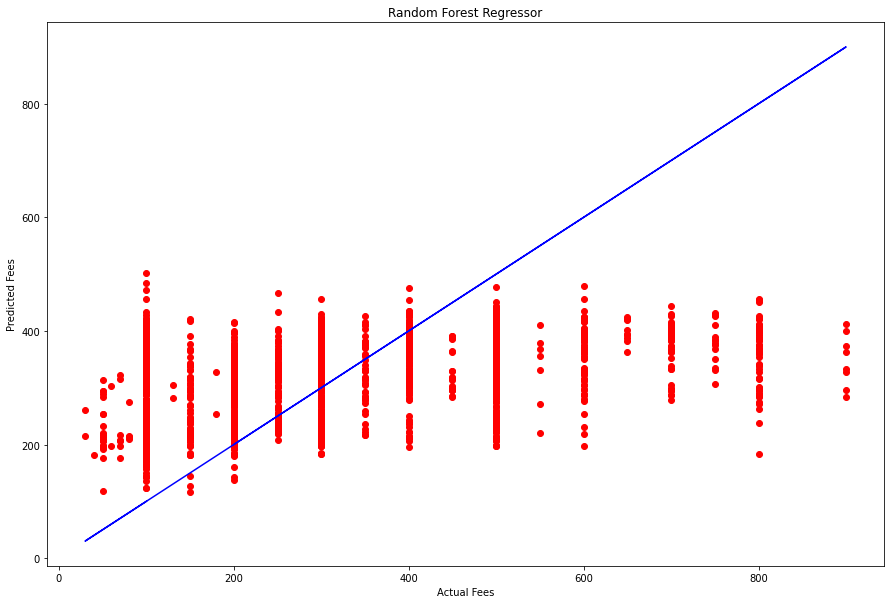

In [ ]:
# plotting the Model

plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=pred_model,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Fees')
plt.ylabel('Predicted Fees')
plt.title('Random Forest Regressor')
plt.show()

**Using the test set to predict the target variable and finally use this prediction variable for submission.**

In [ ]:
Doctor_test.head()

,Experience,Rating,Place,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
5961,35.0,0.0,6,4,1,0,0,0,0,0,0,0,0,0
5962,31.0,0.0,5,3,1,0,0,0,0,0,0,0,1,0
5963,40.0,70.0,1,2,1,0,0,0,0,0,0,0,0,0
5964,0.0,0.0,3,0,0,0,1,0,0,0,0,0,0,0
5965,16.0,100.0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Final_Model is the object for RandomForestRegressor

print("The Prediction of Test Data from best Trained Model is :")
print('\n')
Test_prediction=Final_Model.predict(Doctor_test)    #using test dataset to predict results
Test_prediction

The Prediction of Test Data from best Trained Model is :




array([289.57033053, 340.18794132, 368.66388154, ..., 316.28547459,
       232.39727089, 385.81823014])

In [ ]:
#Creating a DataFrame of the Predicted Values

Test_prediction=pd.DataFrame(Test_prediction, columns=['Fees'])
Test_prediction

,Fees
0,289.570331
1,340.187941
2,368.663882
3,212.704873
4,233.796128
...,...
1982,221.465712
1983,397.878711
1984,316.285475
1985,232.397271


**Saving Predicted Values into a CSV File**

In [ ]:
Test_prediction.to_csv('Test_pred.csv')

**Saving The Model**

In [ ]:
import pickle

filename='Doctor_Consulation_Fees_Prediction.pkl'
pickle.dump(Final_Model,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(Doctor_test)

array([289.57033053, 340.18794132, 368.66388154, ..., 316.28547459,
       232.39727089, 385.81823014])

**--------------------------------------X THANK YOU X--------------------------------------**